Question 1: Top 5 Products by Sales in 2022 for the "Mobiles & Tablets" Category Scenario: The Marketing Team is preparing for a Year-End Festival and needs to identify the top 5 products in the "Mobiles & Tablets" category that had the highest sales quantities in 2022. The products should be filtered to ensure only valid orders are included. Requirements: • Filter the data to include only products from the "Mobiles & Tablets" category in 2022, where the is_valid feature is set to 1. • Group the data by sku_name and category, and sum the qty_ordered for each product. • Rank the products based on their total sales quantity in descending order. • Display the top 5 products with the highest sales quantities. • Generate a horizontal bar chart showing the top 5 products by quantity. Key Features to Use: • category • order_date (for filtering by year) • is_valid (to filter valid orders) • sku_name (for product names) • qty_ordered (for sales quantities)

C:\Users\bhave\AppData\Local\Temp\ipykernel_28184\2956975841.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top5_df = pd.read_sql(query, connection)


Top 5 Mobiles & Tablets in 2022 (by Quantity Sold):
                          sku_name           category  total_qty
0               IDROID_BALRX7-Gold  Mobiles & Tablets     1000.0
1         IDROID_BALRX7-Jet black   Mobiles & Tablets       31.0
2               Infinix Hot 4-Gold  Mobiles & Tablets       15.0
3   samsung_Grand Prime Plus-Black  Mobiles & Tablets       11.0
4  samsung_Grand Prime Plus-Silver  Mobiles & Tablets       10.0


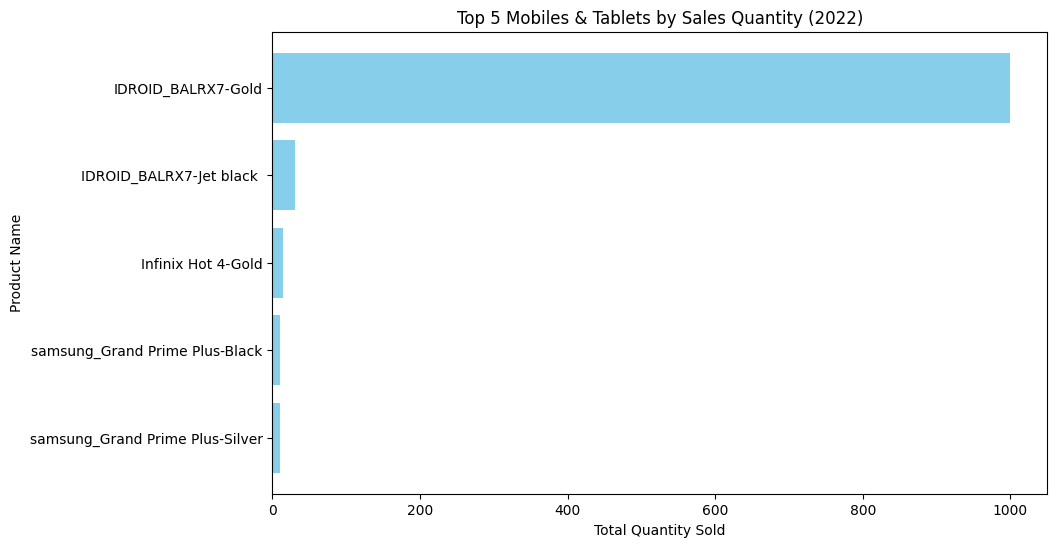

In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

# Database connection details
db_config = {
    "host": "localhost",     # Change to your database host
    "user": "root",          # Change to your database username
    "password": "HA032908@", # Change to your database password
    "database": "sales",     # Change to your database name
    "port": 3306
}

# SQL Query for Question 1
query = """
SELECT 
    s.sku_name,
    s.category,
    SUM(o.qty_ordered) AS total_qty
FROM order_detail o
JOIN sku_detail s 
    ON o.sku_id = s.id
WHERE s.category = 'Mobiles & Tablets'
  AND YEAR(o.order_date) = 2022
  AND o.is_valid = 1
GROUP BY s.sku_name, s.category
ORDER BY total_qty DESC
LIMIT 5;
"""

# Step 1: Connect to Database
connection = pymysql.connect(**db_config)

# Step 2: Execute query and load into pandas
top5_df = pd.read_sql(query, connection)

# Step 3: Close connection
connection.close()

# Step 4: Display the results
print("Top 5 Mobiles & Tablets in 2022 (by Quantity Sold):")
print(top5_df)

# Step 5: Plot Horizontal Bar Chart
plt.figure(figsize=(10, 6))
plt.barh(top5_df["sku_name"], top5_df["total_qty"], color="skyblue")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.title("Top 5 Mobiles & Tablets by Sales Quantity (2022)")
plt.gca().invert_yaxis()  # Highest bar on top
plt.show()
